[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prokaj/elte-python/blob/main/8-gyakorlat.ipynb)

# Házi feladatok

##  `ToDo`

 1. Írjunk egy `ToDo` nevű osztályt, amiben a teendőinket tudjuk nyilvántartani. Egy teendőt, két dolog ír le:

    1.  Szöveges leírás: `str`

    2.  Határidő.

    Az egyedeket a `description` (szöveges leírás) és `deadline` (dátum)
    paraméterekkel inicializáljuk. A dátumot `iso` formátumban adjuk meg,
    azaz sztringként, aminek formátuma `YYYY-MM-DD`, azaz évszám négy
    karaktere, a hónap sorszáma (01-12), a nap sorszáma (01-31)

    Írjuk meg az `__str__` és `__repr__` metódusokat.

    Ha `obj` az osztályunk egy példánya, akkor a `str(obj)` adja vissza a
    `description` mező első legfeljebb 23 karakterét, amit a dátum követ
    `(év. hónap magyar neve nap sorszáma.-ig)` formában. Ha a leírás nem fér
    el, az adott szélességben, akkor az utolsó három karakter legyen `...`.

    pl.

        todo0 = ToDo("El kell készítenem a python gyakorlat házi feladatot", "2022-10-24")
        print(todo0)
        todo1 = ToDo("python hf", "2022-10-24")
        print(todo1)

    eredménye:

        El kell készítenem a... (2022. október 24.-ig)
        python hf (2022. október 24.-ig)

    A `__repr__` metódus az osztály nevét és az inicializáskor használt
    argumentumokat adja vissza a szokásos alakban, `repr(todo0)`
    
    ```
    ToDo("El kell készítenem a python gyakorlat házi feladatot", "2022-10-24")
    ```

    A dátumok kezelését nem kell önállóan elkészíteni, használhatjuk a
    `datetime` module `date` osztályát. Nézzük meg az `isoformat`,
    `fromisoformat`, `year`, `month`, `day` metódusokat.

    A magyar hónapneveket valószínűleg nekünk kell megadni!

    Szokás szerint írjunk teszt függvényt, ami az osztály metódusait
    ellenőrzi 3-4 teszteseten: hosszú leírás, rövid leírás, dátum helyes
    formátumban, dátum helytelen formátumban, leírás nem `str`, stb.

    Ha a dátum helytelen formátumban van vagy a description nem `str`, akkor
    az elvárt működés az, hogy `ValueError` hibát kapunk. Ennek
    teszteléséhez a `pytest` modulból a `raises` függvényt kell importálni
    és a teszt függvényben a

        with raises(ValueError):
            ToDo(...)

    sorokat elhelyezni, ahol a `...` helyén a hibát okozó argumentumok
    állnak.

    A típus annotáció, és a dokumentációs string most opcionális.


In [128]:
try:
    import ipytest
    ipytest.autoconfig()
    
except ModuleNotFoundError:
    print("Trying to install ipytest")
    ! pip install ipytest --quiet
    print("Try again!")

In [129]:
import datetime 

class ToDo:

    def __init__(self, description, date):
        pass
    
    def __str__(self):
        return ""

    def __repr__(self):
        return ""


In [ ]:
%%ipytest
from pytest import raises

def test_ToDo():

    
    todo = ToDo("El kell készítenem a python gyakorlat házi feladatot", "2022-10-24")
    assert str(todo) == "El kell készítenem a... (2022. október 24.-ig)"
    assert repr(todo) == 'ToDo("El kell készítenem a python gyakorlat házi feladatot", "2022-10-24")'
    
    todo = ToDo("python hf", "2022-10-24")
    assert str(todo) == "python hf (2022. október 24.-ig)"
    assert repr(todo) == 'ToDo("python hf", "2022-10-24")'
    
    with raises(ValueError):
        ToDo(12414, "2022-10-22")
    
    with raises(ValueError):
        ToDo("test", "2022-13-22")
    
    with raises(ValueError):
        ToDo("test", datetime.date.fromisoformat("2022-10-22"))
    

## `Permutation`



2.  Írjunk egy `Permutation` osztályt. Permutáció alatt most egy
    $\left\{{0,\dots,n-1}\right\}\to\left\{{0,\dots,n-1}\right\}$ bijekciót
    értünk! Inicializáláskor a $\pi$ permutációt az
    $(\pi(0), \dots,\pi(n-1))$ rendezett $n$-sel adjuk meg.

    Írjuk meg az `__str__` és `__repr__` metódusokat. A `__str__` metódus a
    permutáció ciklus reprezentációját adja vissza a `cycles: ` szöveg után.

    A $\pi$ permutáció egy ciklusa alatt egy $c_0,\dots, c_{k-1}$ sorozatot
    értünk, ahol $\pi(c_t)=c_{t+1}$, ha $t+1<k$ és $\pi(c_{k-1})=c_0$. Ha a
    permutációt írányított gráfként ábrázoljuk ($i\to \pi(i)$ élekkel),
    akkor ezek a keletkező körök. A ciklusok az alaphalmazt ekvivalencia
    osztályokra bontják, a permutáció megadásához elgendő a ciklusokon belül
    feljegyezni a sorrendet. Sőt az egy hosszú ciklusokra nincs is szükség a
    leíráshoz. [További információért, lásd a Wikipédia
    bejegyzést!](https://en.wikipedia.org/wiki/Cycles_and_fixed_points)

    Minden egyes ciklust a legkisebb elemével kezdve írjunk fel, és a
    ciklusok sorrendjét is a legkisebb elemek sorrendje határozza meg. Nem
    kell túlbonyolítani a dolgot. Ha a ciklusokat már kiszámoltuk, akkor a
    ciklusokból álló lista rendezése pont ezt csinálja!

    Példák.

        (0, 1, 2, 3, 4, 5): ciklus reprezentáció = []
        (0, 1, 2, 3, 5, 4): ciklus reprezentáció = [(4,5)]
        (1, 2, 3, 4, 5, 0): ciklus reprezentáció = [(0, 1, 2, 3, 4, 5)]
        (1, 2, 0, 4, 5, 3): ciklus reprezentáció = [(0, 1, 2), (3, 4, 5)]

    A `__repr__` metódus a szokásos alakú, osztály név és az inicializáló
    argumentumok.

    Példák.

        pi0 = Permutation([1, 2, 3, 0])
        print(pi0)       # -> Permutation((1, 2, 3, 0))
        print(repr(pi0)) # -> cycles : [(0, 1, 2, 3)]
        pi1 = Permutation([1, 0, 3, 2])
        print(pi1)       # -> Permutation((1, 0, 3, 2))
        print(repr(pi1)) # -> cycles : [(0, 1), (2, 3)]

    Az `__init__` függvény ellenőrizze, hogy a kapott $n$-es valóban
    permutáció-e, ha nem akkor dobjon `ValueError` hibát! Ezt sem kell
    túlbonyolítani. Ötlet: egy véges függvény pontosan akkor permutáció, ha
    értékkészlete ugyanaz mint az értelmezési tartománya. Jelen esetben az
    értelemzési tartomány `set(range(n))`, ahol `n` a bemenetként kapott
    sorozat hossza!

    Szokás szerint írjunk teszt függvényt, ami az osztály metódusait
    ellenőrzi 4-5 teszteseten, amik között olyan is van amikor az argumentum
    hibás, azaz nem egy permutáció (nem sorozat, nem egészekből álló
    sorozat, ismétlődéseket tartalmazó sorozat, stb)!

    Ha az argumentum hibás akkor az elvárt működés az, hogy `ValueError`
    hibát kapunk. Ennek teszteléséhez a `pytest` modulból a `raises`
    függvényt kell importálni és a teszt függvényben a

        with raises(ValueError):
            Permutation(...)

    sorokat elhelyezni, ahol a `...` helyén a hibát okozó argumentumok
    állnak.

    A típus annotáció, és a dokumentációs string most opcionális.



In [131]:
class Permutation:

    def __init__(self, permutation):
        pass

    def __str__(self):
        return ""

    def __repr(self):
        return ""
    

In [ ]:
%%ipytest

from pytest import raises

def test_Permutation():

    pi = Permutation((0, 1, 2, 3, 4, 5))
    assert str(pi) == "???"
    assert repr(pi) == "[]" #: ciklus reprezentáció = []
    
    pi = Permutation((0, 1, 2, 3, 5, 4))  # : ciklus reprezentáció = [(4,5)]
    assert str(pi) == "???"
    assert repr(pi) == "[(4, 5)]"
        
    pi = Permutation((1, 2, 3, 4, 5, 0)) #: ciklus reprezentáció = [(0, 1, 2, 3, 4, 5)]
    assert str(pi) == "???"
    assert repr(pi) == "[(0, 1, 2, 3, 4, 5)]"
    
    pi = Permutation((1, 2, 0, 4, 5, 3)) #: ciklus reprezentáció = [(0, 1, 2), (3, 4, 5)]
    assert str(pi) == "???"
    assert repr(pi) == "[(0, 1, 2), (3, 4, 5)]"

    pi = Permutation((2, 0, 1))
    assert str(pi) == "???"
    assert repr(pi) == "???"
    
    with raises(ValueError):
        Permutation((1,1,1)) 
    
    with raises(ValueError):
        Permutation((0, 3))
    
    with raises(ValueError):
        Permutation("permutáció")
    

### Vizualizáció

Gráfok gyakran előfordulnak és jó lenne őket ábrázolni. Erre szolgál a [`graphviz` python](https://graphviz.readthedocs.io/) könyvtár.
Ez  python könyvtár az ugyanilyen nevű `C` könyvtárat használja. Azt is le kell tölteni, ha nincs telepítve
[graphviz](https://www.graphviz.org/)

In [145]:
try:
    import graphviz
except ModuleNotFoundError:
    print("On ubuntu try:")
    print("!pip install graphviz")
    print("!sudo apt install graphviz")
    print('Then try again!')

Ezután egy nem túl nagy irányított gráfot, pl. egy véleltlen permutációból kapottat a következőképpen jeleníthetünk meg

permutation before shuffling: [0, 1, 2, 3, 4, 5, 6, 7]
 permutation after shuffling: [6, 2, 0, 5, 4, 7, 1, 3]
{<__main__.Permutation object at 0x7fe61d6461f0>} {'<__main__.Permutation object at 0x7fe61d6461f0>'}


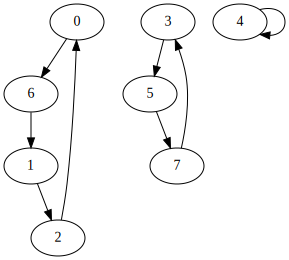

In [176]:
import random

permutation = list(range(8))
print(f"permutation before shuffling: {permutation}")
random.shuffle(permutation)
print(f" permutation after shuffling: {permutation}")

## making edges for graphviz. Node labels must be strings
edges = [(str(head), str(tail)) for head, tail in enumerate(permutation)]
G = graphviz.Digraph()
G.edges(edges)

pi = Permutation(permutation)
print({pi}, {repr(pi)})
G

In [190]:
print(G.pipe(format='dot').decode('utf8'))


digraph {
	graph [bb="0,0,281,252"];
	node [label="\N"];
	0	[height=0.5,
		pos="73,234",
		width=0.75];
	6	[height=0.5,
		pos="27,162",
		width=0.75];
	0 -> 6	[pos="e,37.397,178.82 62.562,217.12 56.798,208.34 49.516,197.26 43.045,187.42"];
	1	[height=0.5,
		pos="27,90",
		width=0.75];
	6 -> 1	[pos="e,27,108.1 27,143.7 27,135.98 27,126.71 27,118.11"];
	2	[height=0.5,
		pos="54,18",
		width=0.75];
	1 -> 2	[pos="e,47.46,35.956 33.399,72.411 36.514,64.335 40.334,54.431 43.835,45.355"];
	2 -> 0	[pos="e,72.523,215.55 57.382,36.12 59.307,46.468 61.606,59.947 63,72 68.381,118.54 71,173 72.168,205.16"];
	3	[height=0.5,
		pos="164,234",
		width=0.75];
	5	[height=0.5,
		pos="146,162",
		width=0.75];
	3 -> 5	[pos="e,150.32,179.79 159.64,216.05 157.61,208.14 155.14,198.54 152.86,189.69"];
	7	[height=0.5,
		pos="173,90",
		width=0.75];
	5 -> 7	[pos="e,166.46,107.96 152.4,144.41 155.51,136.34 159.33,126.43 162.83,117.35"];
	4	[height=0.5,
		pos="236,234",
		width=0.75];
	4 -> 4	[pos="e,255.9,221.57 2

# Conway Game of Life


The Game of Life is a cellular automaton created by mathematician John Conway in 1970. The game consists of a board of cells that are either on or off. One creates an initial configuration of these on/off states and observes how it evolves. There are four simple rules to determine the next state of the game board, given the current state:

- **Overpopulation**: if a living cell is surrounded by more than three living cells, it dies.
- **Stasis**: if a living cell is surrounded by two or three living cells, it survives.
- **Underpopulation**: if a living cell is surrounded by fewer than two living cells, it dies.
- **Reproduction**: if a dead cell is surrounded by exactly three cells, it becomes a live cell.


Írjunk egy osztályt a játékhoz, pl. az `__init__` metódus hozzalétre a megadott konfigurációnak megfelelő objektumot. Legyen egy `step` metódus, ami a rendszert a következő állapotába viszi és az `__str__` metódus pedig
valahogy ábrázolja az aktuális állapotot. 

Tegyük fel, hogy a rács amin a rendszer él, egy $n\times n$-es rács, ahol mindkét irányban ciklikusan körbemegyünk,
azaz a csúcsokat modulo $n$ tekintjük.


In [4]:
class ConwayGoL:
    
    def __init__(self, state):
        self.state = list(state)

    def step(self):
        return self

    def __repr__(self):
        return f"{type(self).__name__}({self.state})"

In [5]:
import random

init_state = [] ## ???
conway = ConwayGoL(init_state)

conway.step()


ConwayGoL([])

A játék állapotának leírásához egy $n\times n$ rács minden pontjáról tudni kell, hogy foglalt-e vagy sem.

```
n = 11
state = [[0]*n for _ in range(n)]
```

Véletlenszerű kezdeti állapot:
```
state = [[random.randint(0,1) for _ in range(n)] for _ in range(n)]
```

In [21]:
def random_state(n, m, p):
    return [[int(random.random()<p) for _ in range(m)] for _ in range(n)]

state = random_state(11, 25, 0.2)
print(state)

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]]


Szebb megjelenítés?

In [22]:
def as_matrix(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

print('\n'.join(''.join(map(str, line)) for line in state))


0000000100000000100000000
0010000001000000000000110
0011000011001000000100101
0000010001000000000000001
0100000000000000000000000
1000100001000001000010010
0010000000000100010000000
0000100000101000011100000
1001010010001010100100000
0000010010000001000100000
0010100010000100010000110


In [23]:
symbols = "\u2b1c\u2b1b"
print('\n'.join(''.join(symbols[x] for x in line) for line in state))


⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬜
⬜⬜⬛⬛⬜⬜⬜⬜⬛⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬛
⬜⬜⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛
⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬛⬜⬜⬜⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬛⬜⬜⬛⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜
⬛⬜⬜⬛⬜⬛⬜⬜⬛⬜⬜⬜⬛⬜⬛⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬛⬛⬜


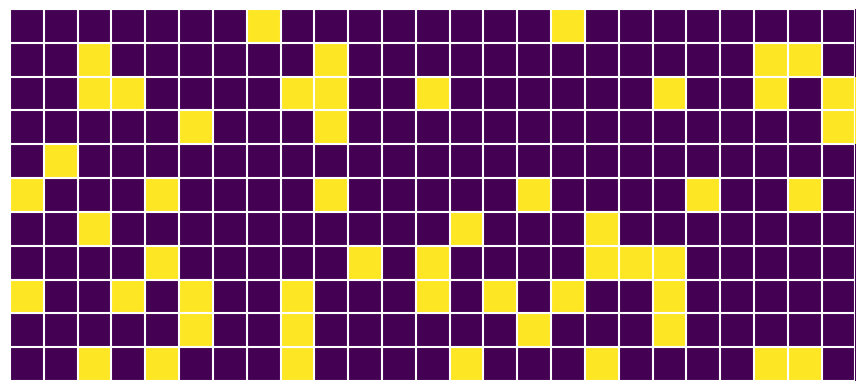

In [24]:
import matplotlib.pyplot as plt 

img = plt.matshow(state, cmap="viridis")
img.axes.axis(False)
n, m = len(state), len(state[0])
for pos in range(0, n+1):
    img.axes.axhline(y=pos-0.5, color="white")
for pos in range(0, m+1):
    img.axes.axvline(x=pos-0.5, color="white")

plt.show()


In [42]:

def cgol_str(self):
    symbols = "\u2b1c\u2b1b"
    return '\n'.join(''.join(symbols[x] for x in line) for line in self.state)

ConwayGoL.__str__ = cgol_str

    

In [43]:
conway = ConwayGoL(state)
print(conway)

⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬜
⬜⬜⬛⬛⬜⬜⬜⬜⬛⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬛
⬜⬜⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛
⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬛⬜⬜⬜⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬛⬜⬜⬛⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜
⬛⬜⬜⬛⬜⬛⬜⬜⬛⬜⬜⬜⬛⬜⬛⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜⬜⬜⬛⬛⬜


A `step` metódushoz ki kellene számolni egy adott csúcs foglalt szomszédainak számát `cnt`. Ha ez kész,
akkor az $i$ csúcs új állapota:

$$
    \text{state}_{t+1}[i]=
    \begin{cases}
    1 &\text{Ha $\text{cnt}[i]\in\{2,3\}$ és $\text{state}_t[i]=1$}\\
    1 &\text{Ha $\text{cnt}[i]\in\{3\}$ és $\text{state}_t[i]=0$}\\
    0 &\text{különben}
    \end{cases}
$$

In [44]:
def newstate(state, count):
    return [int((c==3)|((c==2) & (s==1))) for s, c in  zip(state, count)]

In [46]:
%%ipytest

def test_newstate():
    res = [0]*9
    res[2] = 1
    res[3] = 1
    assert newstate([1]*9, list(range(9))) == res
    res = [0]*9
    res[3] = 1    
    assert newstate([0]*9, list(range(9))) == res


.                                                                                            [100%]
1 passed in 0.01s


In [50]:
def count_neighbors(state):
    strides = [(0,-1), (0, 1), (1,-1), (1,0), (1,1), (-1,-1), (-1,0), (-1,1)] 
    n, m = len(state), len(state[0])
    return [ [sum(state[(i+di) % n][(j+dj) % m] for di, dj in strides) for j in range(m)] for i in range(n)]

def cgol_step(self):
    counts = count_neighbors(self.state)
    self.state = [ newstate(line, cnt) for line, cnt in zip(self.state, counts) ]
    return self
    
ConwayGoL.step = cgol_step

In [51]:
@classmethod
def cgol_from_random_state(cls, n, m,  p):
    return cls(random_state(n, m, p))

ConwayGoL.from_random_state=cgol_from_random_state

In [53]:
conway = ConwayGoL.from_random_state(4, 4, 0.3)
print(conway)
print(count_neighbors(conway.state))

⬜⬛⬛⬜
⬛⬜⬜⬜
⬜⬜⬛⬜
⬜⬜⬛⬜
[[2, 3, 2, 3], [1, 4, 3, 3], [1, 3, 1, 3], [1, 4, 3, 3]]


In [55]:
conway = ConwayGoL.from_random_state(5, 5, 0.5)
print(conway)
print("-"*20)
print(conway.step())

⬛⬛⬛⬛⬜
⬜⬜⬛⬜⬛
⬜⬜⬜⬜⬜
⬜⬛⬛⬜⬛
⬛⬛⬜⬛⬛
--------------------
⬜⬜⬜⬜⬜
⬛⬜⬛⬜⬛
⬛⬛⬛⬜⬜
⬜⬛⬛⬜⬛
⬜⬜⬜⬜⬜


Tudunk-e valami animációszerűt készíteni? Jupyter notebook-ban pl. a következő képpen lehet: 

In [103]:
from ipywidgets import Output
from time import sleep

out = Output()
display(out)
conway = ConwayGoL.from_random_state(n=31, m=55, p=0.2)

for i in range(100):
    out.clear_output(True)
    with out:
        print(f"After {i} steps:\n{conway}")  
    sleep(0.2)
    conway.step()
    # if conway.is_empty():
    #     break


Output()

Ha parancssorból dolgozunk, akkor valami ilyesmit lehetne tenni

In [114]:
%%writefile conway.py

import random


def random_state(n, m, p):
    return [ [ int(random.random()<p) for _ in range(m) ] for _ in range(n) ]

def count_neighbors(state):
    strides = [(0,-1), (0, 1), (1,-1), (1,0), (1,1), (-1,-1), (-1,0), (-1,1)] 
    n, m = len(state), len(state[0])
    return [ [sum(state[(i+di) % n][(j+dj) % m] for di, dj in strides) for j in range(m)] for i in range(n)]

def newstate(state, count):
    return [int((c==3)|((c==2) & (s==1))) for s, c in  zip(state, count)]

class ConwayGoL:
    symbols = "\u2b1c\u2b1b"
    
    def __init__(self, state):
        self.state = list(state)
        
    def step(self):
        counts = count_neighbors(self.state)
        self.state = [ newstate(line, cnt) for line, cnt in zip(self.state, counts) ]
        return self

    
    def __str__(self): 
        symbols = self.symbols
        return '\n'.join(''.join(symbols[x] for x in line) for line in self.state)

    def __repr__(self):
        return f"{type(self).__name__}({self.state})"
    
    @classmethod
    def from_random_state(cls, n, m, p):
        return cls(random_state(n, m, p))

    def is_empty(self):
        return not any(any(line) for line in self.state)


def clear_terminal(n):
    print(f"{chr(27)}[{n+1}A", end="")

def main(n=11, m=25, p=0.2, nsteps=10, clear_screen=clear_terminal):
    from time import sleep
    conway = ConwayGoL.from_random_state(n, m, p)
    for i in range(nsteps+1):
        if i>0:
            clear_screen(n)
        print(f"after {i} step:")
        print(conway)  
        sleep(0.2)
        conway.step()
        if conway.is_empty():
            break
    
if __name__ == "__main__":
    main()
    

Overwriting conway.py


Ha valamit már megírtunk és szeretnénk használni, `import`-tal elérhető. Pl.

### Tudunk-e paramétereket adni a python scriptnek?

Amikor egy python scriptet futtatunk, a parancssor (amivel a futást indítottuk) a `sys` modul `argv` változójában érhető el.

In [59]:
import sys
sys.argv

['/home/prokaj/.config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/ipykernel_launcher.py',
 '--ip=127.0.0.1',
 '--stdin=9008',
 '--control=9006',
 '--hb=9005',
 '--Session.signature_scheme="hmac-sha256"',
 '--Session.key=b"db99881a-64ab-4e2e-9981-ae5604914d0f"',
 '--shell=9007',
 '--transport="tcp"',
 '--iopub=9009',
 '--f=/home/prokaj/.local/share/jupyter/runtime/kernel-v2-507940NnhvVkWruOU8.json']

In [75]:
! python -c 'import sys; print(sys.argv)' -alma


['-c', '-alma']


Egy nagyon egyszerű megoldás, ha minden opciónak a neve a paraméter amit beállít és egyenlőségjel után az értéke:
pl. n=11 m=25 nstep=10 p=0.2

In [77]:
cmdline = "conway.py -n=11 -m=25 -nstep=10 -p=0.2"
argv = cmdline.split()
params =[param.split("=") for param in argv[1:]]
params

[['-n', '11'], ['-m', '25'], ['-nstep', '10'], ['-p', '0.2']]

Minden paraméterről tudni kellene, hogy milyen típusú!

In [80]:
param_types={'-n': int, '-m': int, '-nstep': int, '-p': float}
params = {k.replace("-",""): param_types[k](v)  for k, v in (param.split("=") for param in argv[1:])}
params

{'n': 11, 'm': 25, 'nstep': 10, 'p': 0.2}

Ezek után a `main` függvényt a megadott paraméterekkel meg tudjuk hívni:

```
    main(**params)
```
Mi van a `default` értékekkel, `help`-pel stb.

Ezeket mind meg tudnánk írni, de nem kell. Van kész megoldás `python`-ban.

Az `argparse` könvytár mindent megcsinál, ami nekünk kell.

In [115]:
import argparse

help(argparse)

Help on module argparse:

NAME
    argparse - Command-line parsing library

MODULE REFERENCE
    https://docs.python.org/3.8/library/argparse
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module is an optparse-inspired command-line parsing library that:
    
        - handles both optional and positional arguments
        - produces highly informative usage messages
        - supports parsers that dispatch to sub-parsers
    
    The following is a simple usage example that sums integers from the
    command-line and writes the result to a file::
    
        parser = argparse.ArgumentParser(
            description='sum the integers at the command line')
        parser.add_argument(
      

A `conway.py` file végét cseréljük le erre.
```
if __name__=="__main__":

    import argparse
    
    parser = argparse.ArgumentParser(description='Conways Game of Life')

    parser.add_argument(
        '-n', '--nrows', 
        type=int, 
        default=11, 
        help='number of rows'
        )

    parser.add_argument(
        '-m', '--ncols',
        type=int, 
        default=25, 
        help='number of columns'
        )

    parser.add_argument(
        '-p', '--density',
        type=float, 
        default=0.2,
        help='initial density')
    
    parser.add_argument(
        '--nsteps', 
        type=int, 
        default=10, 
        help='steps to display'
        )

    args = parser.parse_args()
    
    main(n=args.n, m=args.m, p=args.p, nsteps=args.nsteps)
```
    

In [110]:
import importlib
importlib.reload(conway)

<module 'conway' from '/home/prokaj/vgy/22-23i/canvas/code/elte-python/conway.py'>

In [112]:
import conway

out1 = Output()
display(out1)

with out1:
    conway.main(clear_screen=lambda n: out1.clear_output(True))

Output()

Az `argparse` könyvtár nem a legkényelmesebb. Alternatívák:

- [Docopt](http://docopt.org/)
- [Click](https://pypi.org/project/click/)
- [clize](https://github.com/epsy/clize)

és még sok másik is!

# `with` statement


 
## Mi történik a `with` statement alkalmazásakor?

### Mit lehet a with mögé írni?

Hasonlóan a `for`-hoz szinte bármit, aminek van két metódusa:

- `__enter__`
- `__exit__`


    with obj as x:
       do_something with x

Itt az `obj.__enter__()` hívás eredménye lesz az x értéke és a block végén **GARANTÁLTAN** végrehajtódik az `obj.__exit__(...)` hívás.
Az `__enter__` metódus végezheti az előkészítést, az `__exit__` a takarítást!

#### Kell-e nekünk ezeket a metódusokat közvetlenül implementálni?

Valójában nem. Elegendő egy generátor függvényt megírni:

    import time
    
    def timer():
        try:
            start = time.time()
            yield

        finally:
            runtime = time.time() - start
            print(f"run time: {runtime:3f}")
            

Így még csak egy generátort kapunk ami egyszer visszaad semmit (`None`) majd jelzi, hogy vége van a sorozatnak. 

Próbáljuk ki `for`-ral

In [ ]:
import time
    
def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")
        
for x in timer():
    print(x)

`with`-del hibát kapunk

In [ ]:
with timer() as x:
    print(x)

A `contextlib` module `contextmanager` függvénye generátorból `contextmanager`-t készít.

In [ ]:
from contextlib import contextmanager
timer2 = contextmanager(timer)
with timer2() as x:
    print(x)

Ha egy függvény akarunk alkalmazni egy függvényre, hogy azt átalakítsuk, de ugyanaz maradjon a neve akkor a python `@` szintakszist használja. Ilyenkor ,,dekoráljuk'' a függvényt. A `contextmanager` egy példa **dekorátor**ra.

    @contextmanager
    def timer():
        try:
            start = time.time()
            yield

        finally:
            runtime = time.time() - start
            print(f"run time: {runtime:3f}")
    
Példaként írjunk egy olyan contextmanager-t, ami jelzi nekünk, hogy mikor milyen hívás történik.

In [ ]:
@contextmanager
def print_whats_going_on(x):
    print("try blokk előtt")
    try:
        print("yield előtt")
        yield x
        print("yield után")
    except:
        print("except ág")
    finally:
        print("finally ág")
    print("try blokk után")

In [ ]:
with print_whats_going_on("hello") as x:
    print(x)
print("with után")

print("-"*50)

with print_whats_going_on("hello") as x:
    print(x)
    raise ValueError
print("with után")


In [ ]:
@contextmanager
def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")

Előadáson a `property` dekorátor szerepelt.

A `ConwayGoL` példában utólag adtunk metódusokat az osztályunkhoz. Ezt is megtehettük volna dekorátorral.  

In [ ]:
def conway_method(f):
    setattr(ConwayGoL, f.__name__, f)
    return f


@conway_method
def dummy_method(self):
    print("this is a message from the new method!")

c = ConwayGoL([], 0)
c.dummy_method()

Azt is megtehettük volna, hogy a osztály nincs beleégetve a kódba.

In [ ]:
def new_method(cls):
    def decorator(f):
        setattr(cls, f.__name__, f)
        return f 
    return decorator

@new_method(ConwayGoL)
def dummy_method(self):
    print("Note that the old value of dummy_method is overwritten!")

In [ ]:
c.dummy_method()

# `Numpy` könyvtár

# `Matplotlib.pyplot` könytár

In [123]:
import timeit
timeit.timeit('range(10)', number=1000)


0.00022846704814583063